In [40]:
import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
# Data Visualisation
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [25]:
df= pd.read_csv("data.csv")

In [4]:
# Check the head of the dataset
housing.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [5]:
housing.shape

(4600, 18)

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [7]:
housing.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [8]:
# Checking Null values
housing.isnull().sum()*100/housing.shape[0]

date             0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
street           0.0
city             0.0
statezip         0.0
country          0.0
dtype: float64

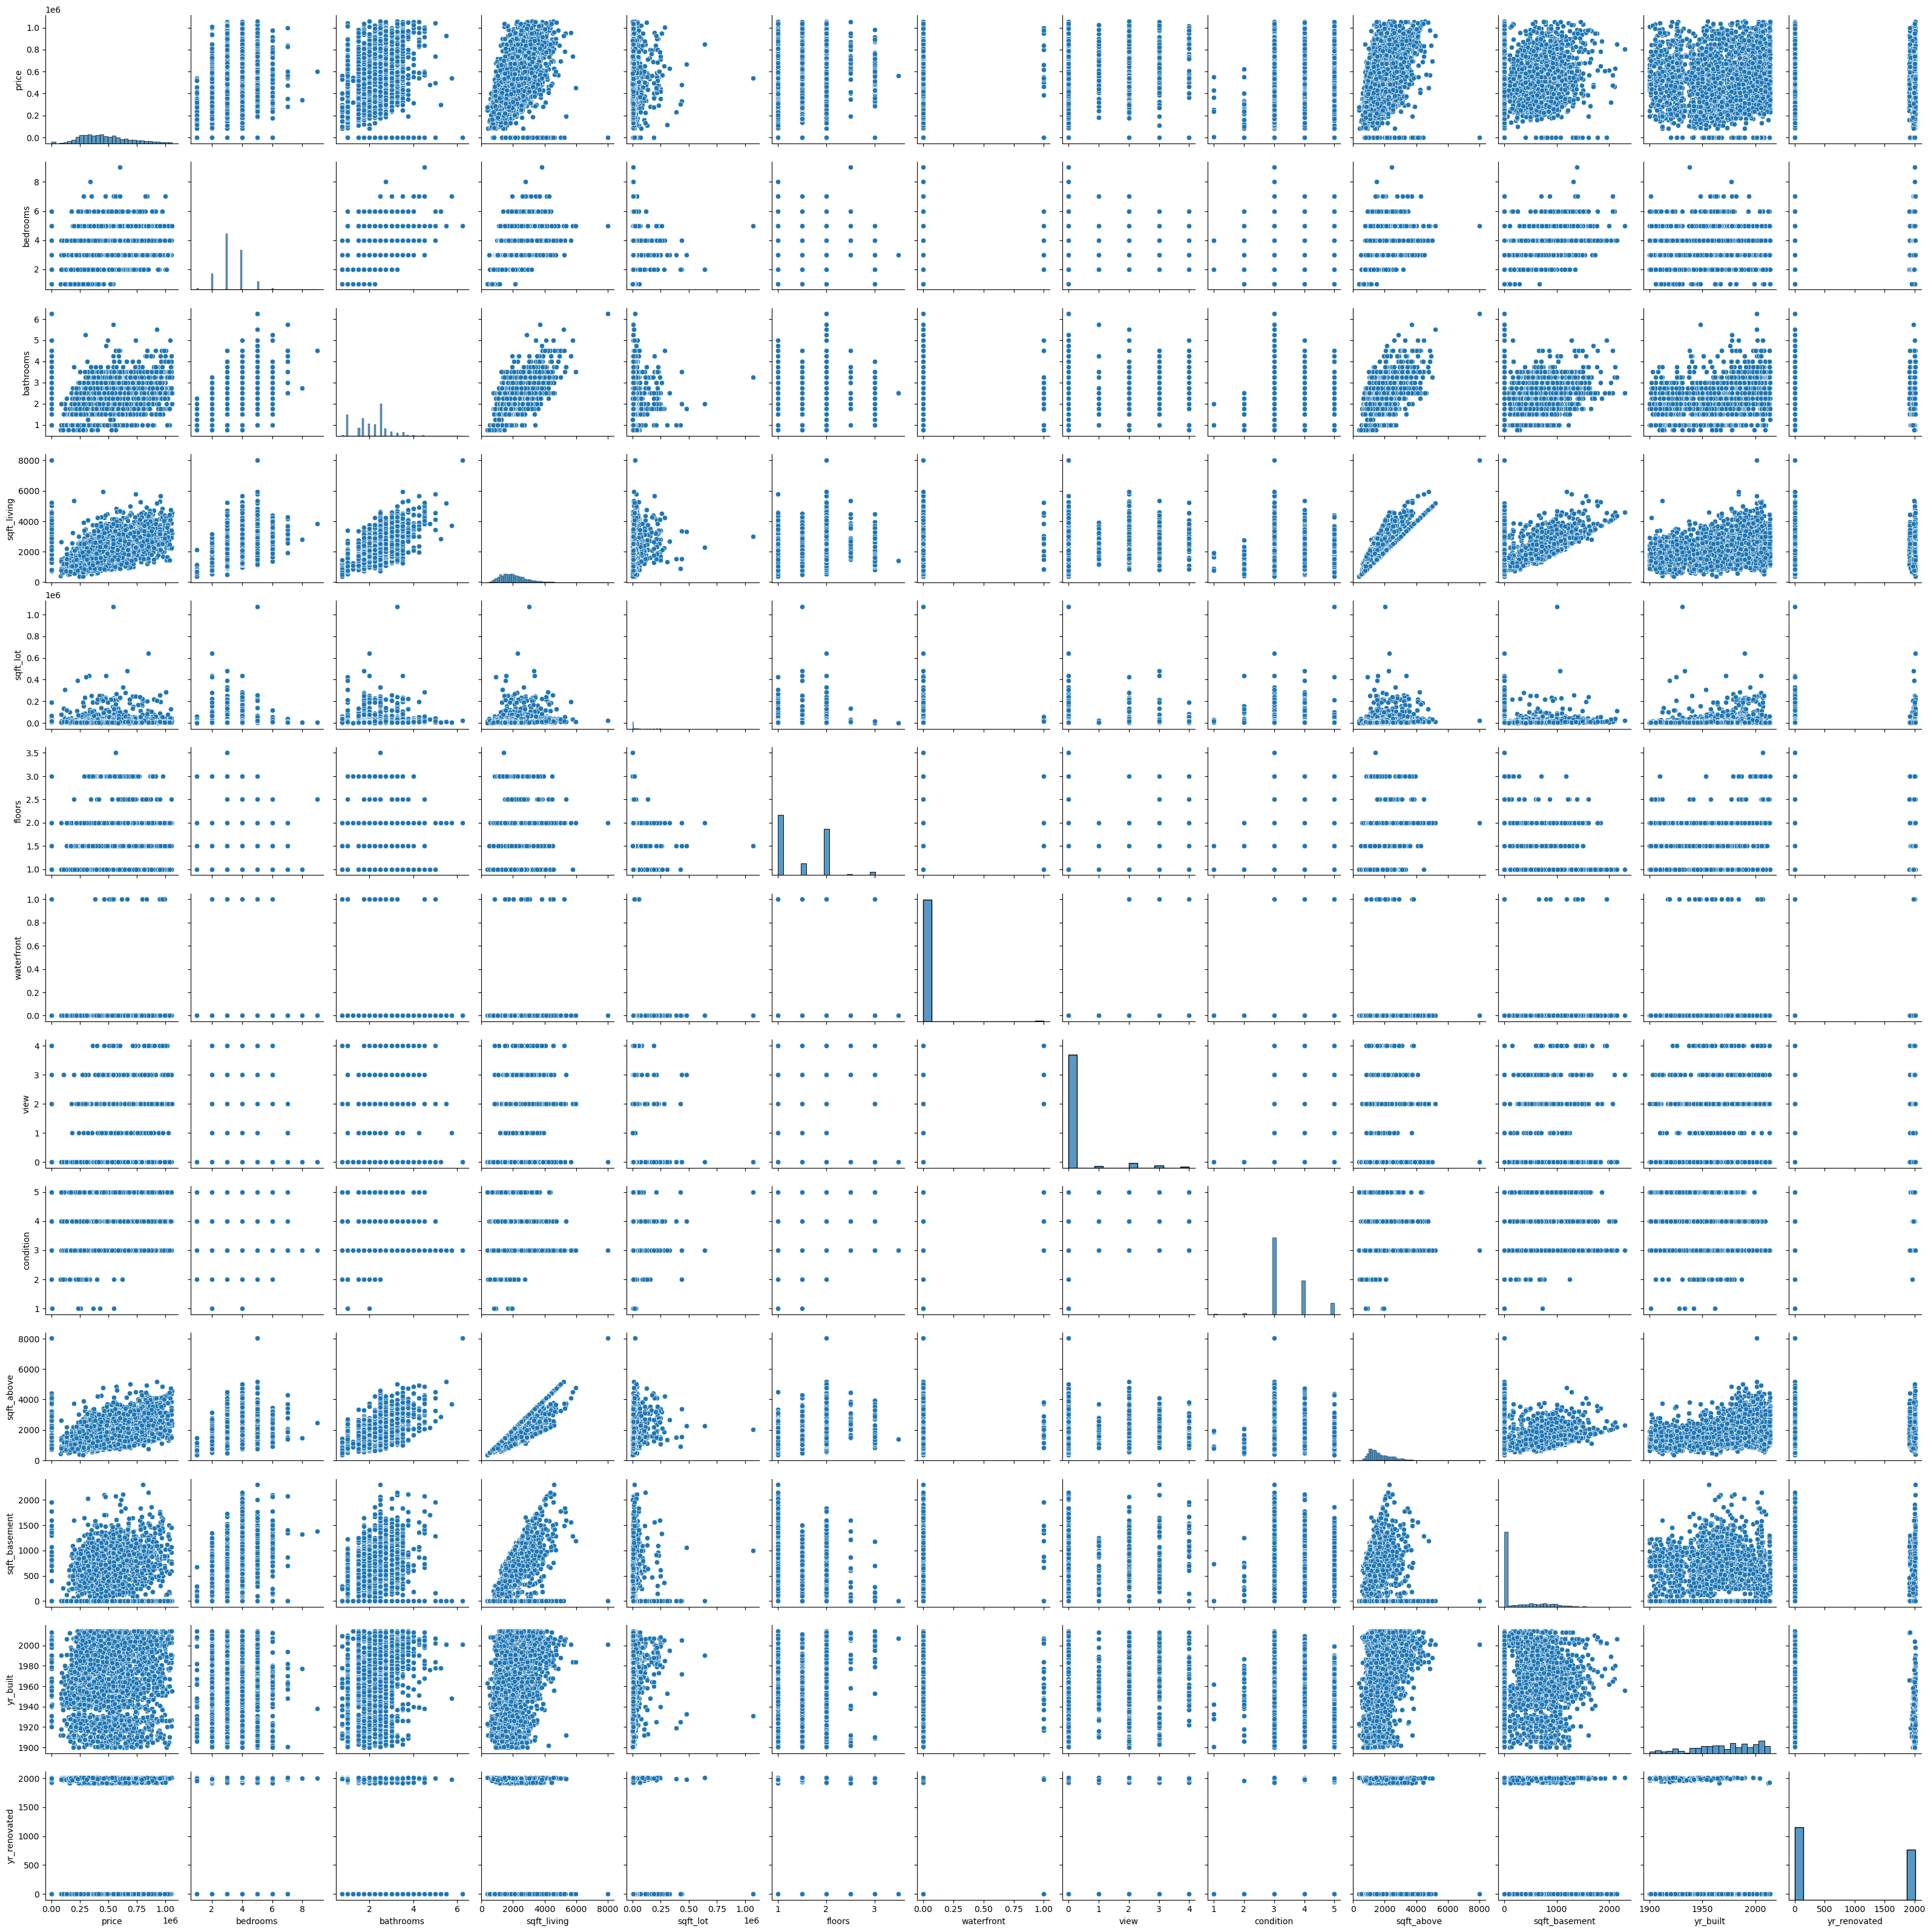

In [19]:
sns.pairplot(housing)
plt.show()

Text(0.5, 1.0, 'Houses which have waterfront')

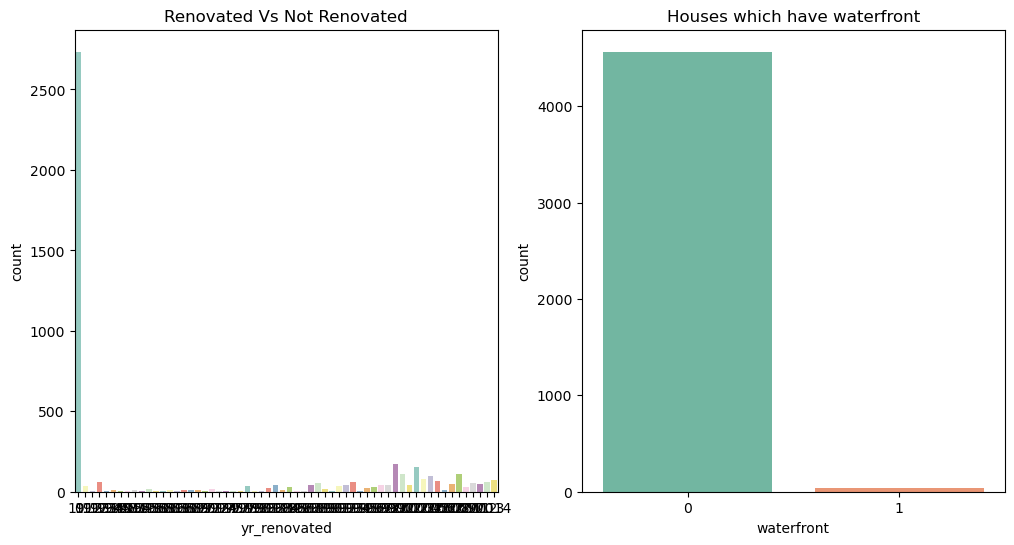

In [27]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2 , 1)
sns.countplot(x='yr_renovated', data=df, palette='Set3')
plt.title('Renovated Vs Not Renovated')

plt.subplot(1, 2 , 2)
sns.countplot(x='waterfront', data=df, palette='Set2')
plt.title('Houses which have waterfront')

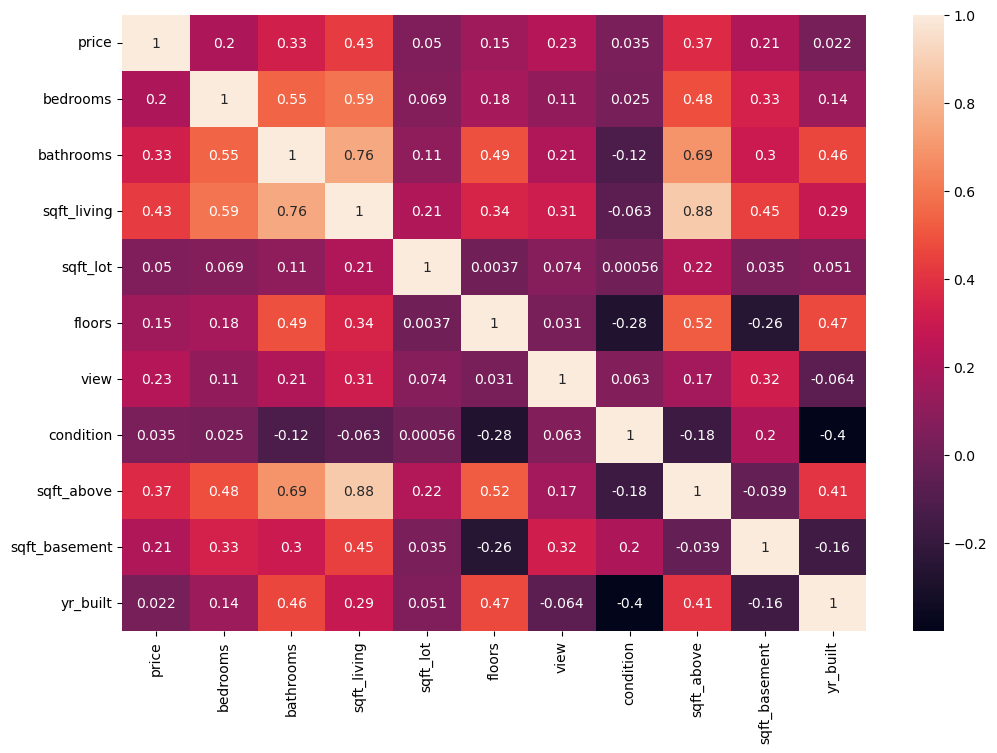

In [28]:
df_corr = df.drop(['city', 'yr_renovated', 'statezip', 'date', 'waterfront'], axis=1)
matrix_corr = df_corr.corr()
figure = plt.figure(figsize=(12, 8))
sns.heatmap(matrix_corr, annot=True)
plt.show()


In [29]:
df = df.drop(['waterfront'], axis=1)

In [30]:
def apply_filter_to_column(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    threshold_multiplier = 3.0
    
    lower_bound = Q1 - threshold_multiplier * IQR
    upper_bound = Q3 + threshold_multiplier * IQR

    filtered_column = df[column].apply(lambda x: x if (x >= lower_bound) and (x <= upper_bound) else None)
    return filtered_column

data_to_filter = ['price', 'sqft_living', 'floors', 'view', 'condition', 'yr_built']
df_copy = df.copy()

for column in data_to_filter:
    filtered_column = apply_filter_to_column(column)
    df_copy[f'{column}_filtered'] = filtered_column


df_copy = df_copy.dropna(how='all', subset=[f'{column}_filtered' for column in data_to_filter])

filtered_columns = df_copy.columns.tolist()

print(filtered_columns)

['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country', 'price_filtered', 'sqft_living_filtered', 'floors_filtered', 'view_filtered', 'condition_filtered', 'yr_built_filtered']


<Figure size 600x600 with 0 Axes>

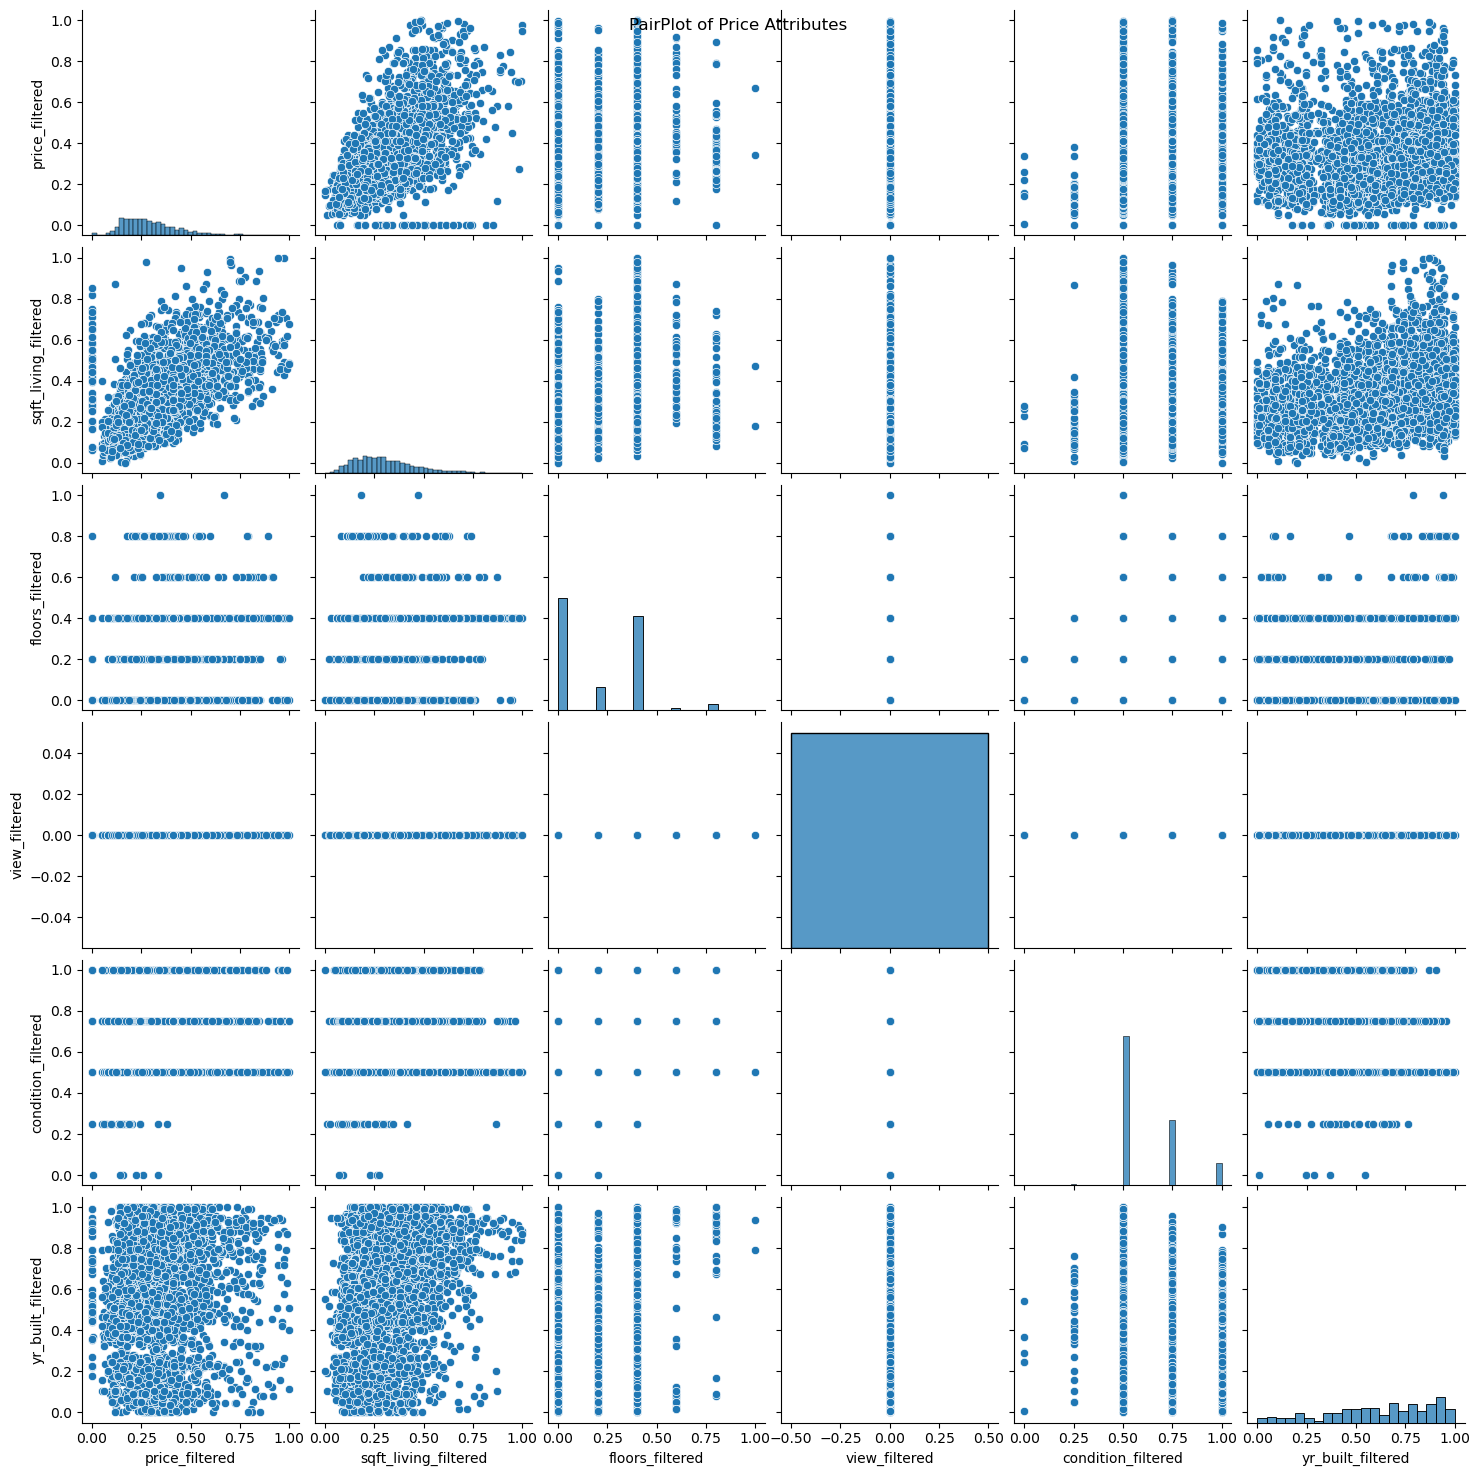

In [33]:
data_to_plot = ['price_filtered', 'sqft_living_filtered', 'floors_filtered', 'view_filtered', 'condition_filtered', 'yr_built_filtered']
if df_copy is not None and not df_copy.empty:
    scaler = MinMaxScaler()
    df_copy = scaler.fit_transform(df_copy[data_to_plot])
    df_copy = pd.DataFrame(df_copy, columns=data_to_plot)
    plt.figure(figsize=(6, 6))
    sns.pairplot(df_copy)
    plt.suptitle('PairPlot of Price Attributes')
    plt.show()
else:
    print("Filtered data is empty or None. Check your ebalo")

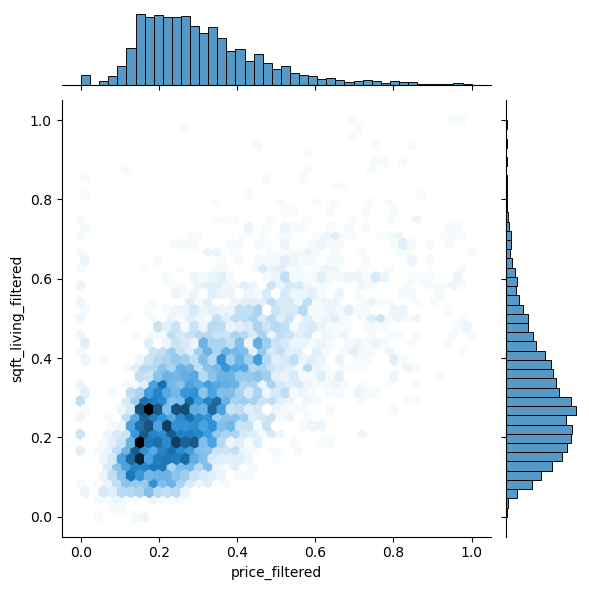

In [34]:
sns.jointplot(data=df_copy, x='price_filtered', y='sqft_living_filtered', kind = "hex", dropna=True)

In [35]:
df_x = df_copy['sqft_living_filtered'].to_numpy()
df_y = df_copy['price_filtered'].to_numpy()

indexes_to_remove = np.where(df_y == 0)[0]
df_y = np.delete(df_y, indexes_to_remove)
df_x = np.delete(df_x, indexes_to_remove)

df_copy.dropna(subset=['price_filtered', 'sqft_living_filtered'], inplace=True)
if df_copy[['price_filtered', 'sqft_living_filtered']].isna().any().any():
    print("There are still NaN values in the data.")
else:
    print("No NaN values found, proceed with model training.")

No NaN values found, proceed with model training.


In [38]:
df_x = df_x.reshape(-1, 1)
dx_y = df_y.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

x_train shape: (3640, 1)
y_train shape: (3640,)


In [42]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

In [45]:
import numpy as np

# Find indices of rows with missing values in x_train
missing_rows = np.isnan(x_train).any(axis=1)

# Remove rows with missing values from both x_train and y_train
x_train = x_train[~missing_rows]
y_train = y_train[~missing_rows]

In [47]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
y_train_imputed = imputer.fit_transform(x_train)
y_test_imputed = imputer.transform(x_test)

In [50]:
import numpy as np

# Find indices of rows with missing values in x_train
missing_rows = np.isnan(x_train).any(axis=1)

# Remove rows with missing values from both x_train and y_train
x_train = x_train[~missing_rows]
y_train = y_train[~missing_rows]

In [57]:
import numpy as np

has_missing_values = np.isnan(y_train).any()
if has_missing_values:
    print("y_train contains missing values.")
else:
    print("y_train does not contain missing values.")

y_train contains missing values.


In [58]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
y_train_imputed = imputer.fit_transform(y_train.reshape(-1, 1))
y_train = y_train_imputed.flatten()

In [60]:
import numpy as np

has_missing_values = np.isnan(x_train).any()
if has_missing_values:
    print("x_train contains missing values.")
else:
    print("x_train does not contain missing values.")

x_train does not contain missing values.


In [61]:
from sklearn.impute import SimpleImputer

# Create an imputer with the same strategy used for training data
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the test data
x_test_imputed = imputer.fit_transform(x_test)

# Now, you can use x_test_imputed for prediction
y_pred = model.predict(x_test_imputed)

In [62]:
# Find rows with missing values in x_test
missing_rows = np.isnan(x_test).any(axis=1)

# Remove rows with missing values
x_test = x_test[~missing_rows]

# Make predictions on the cleaned x_test
y_pred = model.predict(x_test)

In [63]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


In [64]:
from sklearn.metrics import mean_squared_error, r2_score

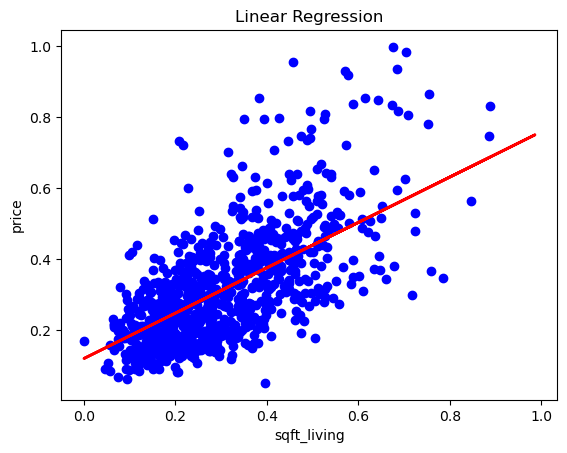

In [68]:
plt.scatter(x_test, y_test, color='blue')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.title('Linear Regression')
plt.show()

In [70]:
import joblib

In [71]:
joblib.dump(model, 'linear_regression.pkl')

['linear_regression.pkl']

In [72]:
model = joblib.load('linear_regression.pkl')
data_test = pd.DataFrame({'sqft_living': [0.6, 0.2, 1]})
predictions = model.predict(data_test)
print(predictions)

[0.50271076 0.24741288 0.75800864]
